# <b>Avalia o comportamento das Requests</b>

In [1]:
# Importando as dependências
from quantumnet.components import Controller, Network
from quantumnet.objects import time
from simulations.simulation import Sim 

Informações a serem coletadas

In [2]:
received_requests = {}
successful_requests = {}
fulfilled_requests = {}

### <b>Preenchimento Proativo</b>

In [3]:
# Parâmetros das simulações
network_info = {
    'n_initial_qubits': 10,
    'n_initial_eprs': 10,
    'topology_name': 'Grade',
    'topology_params': (3, 4),
    'time_to_refill': 10,
}
controller_info = {
    'default_ttl': 50,
}
request_info = {
    'num_hosts': 12,
    'n_requests': 100,
    'traffic_type': 'random',
    'burst_probability': 0.3,
    'burst_size': 25,
    'requests_per_burst': 5,
    'fmin_range': (0.5, 1.0),
    'eprs_range': (1, 10),
}
# Exclusivo para preenchimento proativo e hibrido
proactive_params = {
    1 : { 'frange': (0.6, 0.7), 'neprs': 10 },
    5:  { 'frange': (0.8, 0.9), 'neprs': 10 },
}

In [4]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
print(f"Requests: {sim.requests}")

# Preenche as tabelas de forma proativa
for alice in sim.network.hosts:
    print(f"Adicionando regras para {alice}")
    for bob in sim.network.hosts:
        for key in proactive_params.keys():
            sim.controller.add_match_route_rule_in_host_proactive(alice, bob, proactive_params[key]['frange'], proactive_params[key]['neprs'])
    # Mostra as tabelas
    sim.network.get_host(alice).draw_flow_table()

Requests: [R8F4CB0:3-9:0.74:10, RB2CA70:3-1:0.6:1, R2F7EF0:8-11:0.94:10, RE95880:0-11:0.66:2, RE7AAE0:2-7:0.89:1, RE7AB10:2-10:0.78:4, RE7AB40:5-0:0.99:4, RE7AB70:4-9:0.59:10, RE7ABA0:9-7:0.69:10, RE7ABD0:6-1:0.98:5, RE7AC00:10-3:0.73:1, RE7AC30:10-4:0.69:5, RE7AC60:3-9:0.69:10, RE7AC90:1-0:0.93:3, RE7ACC0:4-3:0.77:6, RE7ACF0:3-2:0.61:8, RE7AD20:5-7:0.63:2, RE7AD50:5-8:0.92:4, RE7AD80:9-4:0.91:9, RE7ADB0:2-0:0.93:4, RE7ADE0:11-9:0.99:3, RE7AE10:6-4:0.55:2, RE7AE40:7-9:0.6:3, RE7AE70:5-4:0.61:5, RE7AEA0:10-8:0.67:7, RE7AED0:9-2:0.86:8, RE7AF00:7-8:0.55:3, RE7AF30:4-6:0.75:4, RE7AF60:6-9:0.59:5, RE7AF90:7-4:0.51:8, RE7AFC0:1-2:0.79:9, RE7AFF0:3-4:0.5:6, RE7B020:8-3:0.67:1, RE7B050:11-4:0.97:3, RE7B080:1-10:0.92:9, RE7B0B0:7-9:0.88:2, RE7B0E0:6-7:0.88:7, RE7B110:10-0:0.67:4, RE7B140:4-8:0.85:8, RE7B170:7-4:0.97:8, RE7B1A0:2-8:0.65:1, RE7B1D0:3-0:0.83:3, RE7B200:7-11:0.76:5, RE7B230:5-10:0.97:5, RE7B260:7-3:0.79:1, RE7B290:4-11:0.68:6, RE7B2C0:0-6:0.64:8, RE7B2F0:8-2:0.88:8, RE7B320:6-3:0.

In [5]:
# Processa as requisições
for request in sim.requests:
    print(f"[Time {time.get_current_time()}] Processando requisição {request}.")
    alice = sim.network.get_host(request.alice)
    rule = alice.find_rule_by_request(request)

    if rule == False:  # Caso não exista um match na tabela
        print(f"[Time {time.get_current_time()}] Descartando requisição {request} no Host {alice}.")
        request.starttime = time.get_current_time()
        request.endtime = time.get_current_time()
        # Registra a requisição descartada
        sim.controller.fulfill_request(request)
        
    else:  # Caso já exista a regra
        print(f"[Time {time.get_current_time()}] Atendendo requisição {request} no Host {alice}.")
        request.starttime = time.get_current_time()
        sim.controller.run_rule(rule[1])
        request.endtime = time.get_current_time() + 1        
        # Registra a requisição atendida
        sim.controller.successful_request(request)
        # Exibir informações da requisição
        print(f"Request {request}: Start Time = {request.starttime}, End Time = {request.endtime}")
        
    # Atualiza o tempo
    sim.update_time(1)

# Salva as requisições
received_requests['proativo'] = sim.requests.copy()
successful_requests['proativo'] = sim.controller.successful_requests
fulfilled_requests['proativo'] = sim.controller.fulfilled_requests

# Fim da simulação
time.reset()


[Time 0] Processando requisição R8F4CB0:3-9:0.74:10.
[Time 0] Descartando requisição R8F4CB0:3-9:0.74:10 no Host 3.
[Time 1] Processando requisição RB2CA70:3-1:0.6:1.
[Time 1] Atendendo requisição RB2CA70:3-1:0.6:1 no Host 3.
[BasicRuleProactive] Passo: 1
[BasicRuleProactive] Ação: CreateEPR(3-2)
[BasicRuleProactive] Ação: CreateEPR(2-1)
[BasicRuleProactive] Passo: 2
[BasicRuleProactive] Ação: Swap(3-2-1)
Running Swap(3-2-1)
Request RB2CA70:3-1:0.6:1: Start Time = 1, End Time = 2
[Time 2] Processando requisição R2F7EF0:8-11:0.94:10.
[Time 2] Descartando requisição R2F7EF0:8-11:0.94:10 no Host 8.
[Time 3] Processando requisição RE95880:0-11:0.66:2.
[Time 3] Atendendo requisição RE95880:0-11:0.66:2 no Host 0.
[BasicRuleProactive] Passo: 1
[BasicRuleProactive] Ação: CreateEPR(0-4)
[BasicRuleProactive] Ação: CreateEPR(4-8)
[BasicRuleProactive] Ação: CreateEPR(8-9)
[BasicRuleProactive] Ação: CreateEPR(9-10)
[BasicRuleProactive] Ação: CreateEPR(10-11)
[BasicRuleProactive] Passo: 2
[BasicRule

### <b>Preenchimento Reativo</b>

In [6]:
# Parâmetros das simulações
network_info = {
    'n_initial_qubits': 10,
    'n_initial_eprs': 10,
    'topology_name': 'Grade',
    'topology_params': (3, 4),
    'time_to_refill': 10,
}
controller_info = {
    'default_ttl': 50,
}
request_info = {
    'num_hosts': 12,
    'n_requests': 100,
    'traffic_type': 'random',
    'burst_probability': 0.3,
    'burst_size': 25,
    'requests_per_burst': 5,
    'fmin_range': (0.5, 1.0),
    'eprs_range': (1, 10),
}

In [7]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
print("Requests:", sim.requests)

for request in sim.requests:
        print(f"[Time {time.get_current_time()}] Processando requisição {request}...")
        alice = sim.network.get_host(request.alice)
        rule = alice.find_rule_by_request(request)

        if rule == False:  # Caso não exista um match na tabela
            request.starttime = time.get_current_time()
            sim.update_time(3)
            alice.draw_flow_table()
            print(f"[Time {time.get_current_time()}] Adicionando regra no Host {alice}")
            sim.controller.add_match_route_rule_in_host_reactive(request)
            alice.draw_flow_table()
            rule = alice.find_rule_by_request(request)
            
        else:  # Caso já exista a regra
            print(f"[Time {time.get_current_time()}] Regra existente para {request} no Host {alice}.")
            request.starttime = time.get_current_time()
            sim.update_time(1)
                
        # Executa a regra
        print(f"[Time {time.get_current_time()}] Atendendo requisição {request} no Host {alice}.")
        sim.controller.run_rule(rule[1])
        request.endtime = time.get_current_time()
        # Registra a requisição atendida
        sim.controller.successful_request(request)
        
        # Exibir informações da requisição
        print(f"[Time {time.get_current_time()}] Request {request}: Start Time = {request.starttime}, End Time = {request.endtime}")

# Salva as requisições
received_requests['reativo'] = sim.requests.copy()
successful_requests['reativo'] = sim.controller.successful_requests
fulfilled_requests['reativo'] = sim.controller.fulfilled_requests

# Fim da simulação
time.reset()

Requests: [R754860:4-7:0.66:8, REA8B00:2-0:0.57:3, REA8B30:2-1:0.73:2, REA8B60:5-2:0.85:5, REA8B90:9-2:0.64:5, REA8BC0:9-6:0.87:6, REA8BF0:2-4:0.88:10, REA8C20:10-5:0.58:8, REA8C50:1-5:0.53:3, REA8C80:1-0:0.91:4, REA8CB0:10-6:0.57:9, REA8CE0:6-11:0.86:9, REA8D10:0-9:0.65:10, REA8D40:9-5:0.63:2, REA8D70:10-3:0.52:3, REA8DA0:6-9:0.66:2, REA8DD0:8-6:0.64:1, REA8E00:7-8:0.66:9, REA8E30:7-3:0.52:3, REA8E60:3-7:0.89:2, REA8E90:11-7:0.57:9, REA8EC0:7-11:0.95:6, REA8EF0:9-4:0.96:3, REA8F20:11-3:0.79:3, REA8F50:5-11:0.55:9, REA8F80:9-2:0.99:10, REA8FB0:11-7:0.86:9, REA8FE0:7-11:0.6:8, REA9010:0-10:1.0:8, REA9040:7-4:0.76:10, REA9070:3-6:0.82:2, REA90A0:1-10:0.64:10, REA90D0:9-0:0.99:10, REA9100:1-11:0.93:6, REA9130:3-9:0.9:10, REA9160:4-7:0.85:7, REA9190:10-7:0.85:2, REA91C0:3-2:0.73:8, REA91F0:9-2:0.7:6, REA9220:5-6:0.74:7, REA9250:11-5:0.76:9, REA9280:1-10:0.77:8, REA92B0:4-3:0.6:1, REA92E0:3-5:0.73:9, REA9310:4-6:0.92:6, REA9340:5-6:0.6:5, REA9370:7-3:0.9:1, REA93A0:4-3:0.71:6, REA93D0:7-5:0

### <b>Preenchimento Híbrido</b>

In [8]:
# Parâmetros das simulações
network_info = {
    'n_initial_qubits': 10,
    'n_initial_eprs': 10,
    'topology_name': 'Grade',
    'topology_params': (3, 4),
    'time_to_refill': 10,
}
controller_info = {
    'default_ttl': 50,
}
request_info = {
    'num_hosts': 12,
    'n_requests': 100,
    'traffic_type': 'random',
    'burst_probability': 0.3,
    'burst_size': 25,
    'requests_per_burst': 5,
    'fmin_range': (0.5, 1.0),
    'eprs_range': (1, 10),
}
# Exclusivo para preenchimento proativo e hibrido
proactive_params = {
    1 : { 'frange': (0.6, 0.7), 'neprs': 10 },
    5:  { 'frange': (0.8, 0.9), 'neprs': 10 },
}

In [9]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)

# Preenche as tabelas de forma proativa
for alice in sim.network.hosts:
    print(f"Adicionando regras para {alice}")
    for bob in sim.network.hosts:
        for key in proactive_params.keys():
            sim.controller.add_match_route_rule_in_host_proactive(alice, bob, proactive_params[key]['frange'], proactive_params[key]['neprs'])
    # Mostra as tabelas
    sim.network.get_host(alice).draw_flow_table()

Adicionando regras para 0
+----------------------+----------------------+--------------------+
| Match                | Route                | Rule               |
+======================+======================+====================+
| (0, (0.6, 0.7), 10)  | [0]                  | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (0, (0.8, 0.9), 10)  | [0]                  | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (1, (0.6, 0.7), 10)  | [0, 1]               | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (1, (0.8, 0.9), 10)  | [0, 1]               | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (2, (0.6, 0.7), 10)  | [0, 1, 2]            | BasicRuleProactive |
+----------------------+----------------------+--------------------+
| (2, (0.8, 0.9), 10)  | [0, 1, 2]            | BasicRuleProactive |
+-------

In [10]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
print("Requests:", sim.requests)

for request in sim.requests:
        print(f"[Time {time.get_current_time()}] Processando requisição {request}...")
        alice = sim.network.get_host(request.alice)
        rule = alice.find_rule_by_request(request)

        if rule == False:  # Caso não exista um match na tabela
            request.starttime = time.get_current_time()
            sim.update_time(3)
            alice.draw_flow_table()
            print(f"[Time {time.get_current_time()}] Adicionando regra no Host {alice}")
            sim.controller.add_match_route_rule_in_host_reactive(request)
            alice.draw_flow_table()
            rule = alice.find_rule_by_request(request)
            
        else:  # Caso já exista a regra
            print(f"[Time {time.get_current_time()}] Regra existente para {request} no Host {alice}.")
            request.starttime = time.get_current_time()
            sim.update_time(1)
                
        # Executa a regra
        print(f"[Time {time.get_current_time()}] Atendendo requisição {request} no Host {alice}.")
        sim.controller.run_rule(rule[1])
        request.endtime = time.get_current_time()
        # Registra a requisição atendida
        sim.controller.successful_request(request)
        
        # Exibir informações da requisição
        print(f"[Time {time.get_current_time()}] Request {request}: Start Time = {request.starttime}, End Time = {request.endtime}")

# Salva as requisições
received_requests['hibrido'] = sim.requests.copy()
successful_requests['hibrido'] = sim.controller.successful_requests
fulfilled_requests['hibrido'] = sim.controller.fulfilled_requests

# Fim da simulação
time.reset()

Requests: [RF84380:1-0:0.75:10, RF84470:5-11:0.52:8, RF844A0:0-1:0.8:6, RF844D0:6-1:0.84:2, RF84500:9-10:0.96:2, RF84530:11-2:0.97:4, RF84560:2-0:0.83:2, RF84590:7-0:0.85:5, RF845C0:11-3:0.57:8, RF845F0:7-9:0.9:10, RF84620:11-3:0.66:8, RF84650:0-1:0.75:6, RF84680:10-4:0.51:5, RF846B0:8-1:0.64:1, RF846E0:2-11:0.7:7, RF84710:8-7:0.68:5, RF84740:5-10:0.84:6, RF84770:0-7:0.75:8, RF847A0:11-6:1.0:1, RF847D0:10-3:0.54:2, RF84800:7-8:0.62:2, RF84830:9-8:0.84:2, RF84860:0-9:0.78:4, RF84890:2-6:0.8:3, RF848C0:6-2:0.77:8, RF848F0:2-0:0.65:6, RF84920:5-10:0.89:8, RF84950:3-7:0.9:9, RF84980:7-1:0.65:9, RF849B0:2-0:0.72:8, RF849E0:0-1:0.51:4, RF84A10:0-11:0.76:7, RF84A40:3-2:0.62:10, RF84A70:5-6:0.95:4, RF84AA0:4-8:0.65:7, RF84AD0:7-11:0.88:4, RF84B00:7-2:0.7:1, RF84B30:8-11:0.9:5, RF84B60:0-9:0.73:3, RF84B90:3-7:0.86:6, RF84BC0:9-0:0.67:6, RF84BF0:2-11:0.78:6, RF84C20:10-1:0.6:5, RF84C50:8-7:0.61:5, RF84C80:4-9:0.58:2, RF84CB0:10-11:0.68:8, RF84CE0:2-1:0.55:7, RF84D10:11-0:0.6:1, RF84D40:10-0:0.75

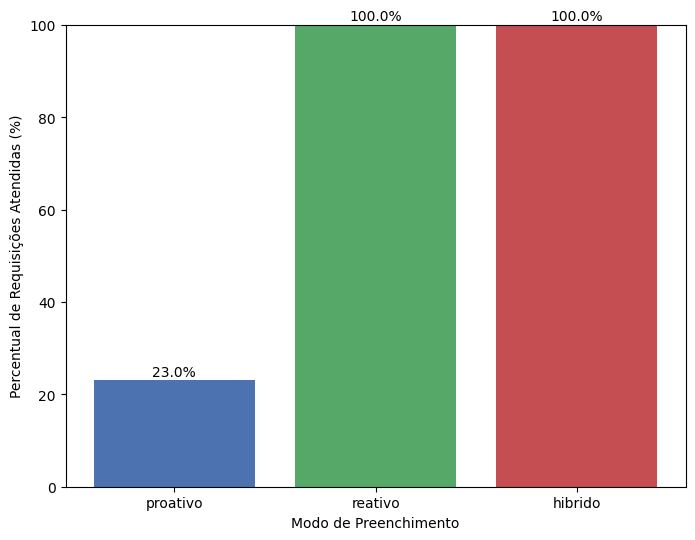

In [11]:
import matplotlib.pyplot as plt

def calcular_percentual_atendimento(requisicoes_recebidas, requisicoes_atendidas):
    # Cálculo do percentual de atendimento por modo
    percentual_atendido = {}
    for modo in requisicoes_recebidas:
        total_recebidas = len(requisicoes_recebidas[modo])
        total_atendidas = len(requisicoes_atendidas[modo])
        percentual_atendido[modo] = (total_atendidas / total_recebidas) * 100 if total_recebidas > 0 else 0
    return percentual_atendido

percentual = calcular_percentual_atendimento(received_requests, successful_requests)

# Plotagem do gráfico
plt.figure(figsize=(8, 6))
plt.bar(percentual.keys(), percentual.values(), color=['#4c72b0', '#55a868', '#c44e52'])

plt.xlabel('Modo de Preenchimento')
plt.ylabel('Percentual de Requisições Atendidas (%)')
plt.ylim(0, 100)

# Exibe o valor de cada barra
for i, v in enumerate(percentual.values()):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.show()


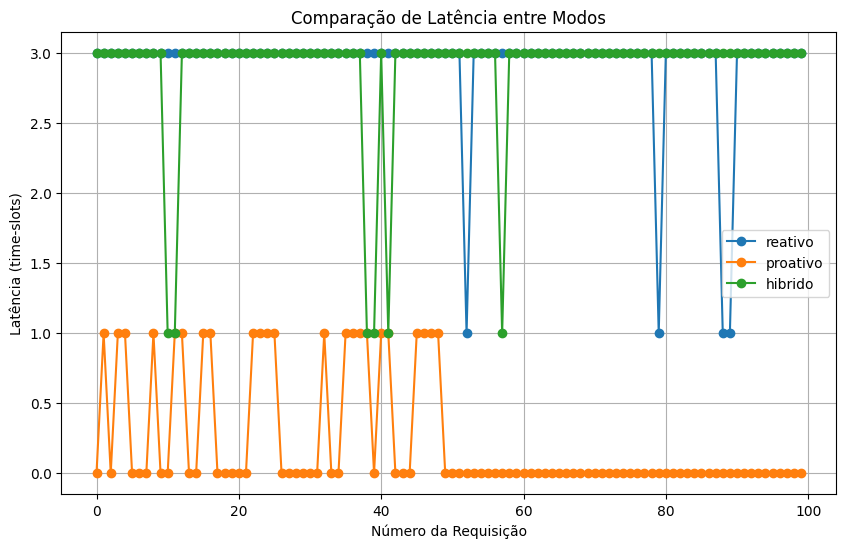

In [12]:
def plotar_latencia(requisicoes_por_modo):
    latencias = {'reativo': [], 'proativo': [], 'hibrido': []}
    
    for modo, requisicoes in requisicoes_por_modo.items():
        for request in requisicoes:
            latencia = request.endtime - request.starttime
            latencias[modo].append(latencia)
    
    plt.figure(figsize=(10, 6))
    
    for modo, dados in latencias.items():
        ids = list(range(len(dados)))  # Criar uma sequência de 0 a n para o eixo X
        plt.plot(ids, dados, marker='o', label=modo)
    
    plt.xlabel('Número da Requisição')
    plt.ylabel('Latência (time-slots)')
    plt.title('Comparação de Latência entre Modos')
    plt.legend()
    plt.grid(True)
    plt.show()

plotar_latencia(received_requests)